In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('dataset/Book1.xlsx')

In [4]:
df.shape

(416921, 24)

In [5]:
df.head()

,Unnamed: 0,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,Start_Year,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,...,2012,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,...,2012,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,...,2012,2012-07-24,2013-03-28,8,1,197757,1,0,0,24
3,20,HarvardX,CS50x,2012,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,2012,2012-07-24,2013-07-15,25,2,197757,4,0,0,20
4,22,HarvardX,PH207x,2012,Fall,MHxPC130317399,0,0,0,Australia,...,2012,2012-07-24,2012-08-25,3,2,197757,0,0,0,32


In [6]:
col_names = df.columns

col_names

Index(['Unnamed: 0', 'institute', 'course_id', 'year', 'semester', 'userid_DI',
       'viewed', 'explored', 'certified', 'final_cc_cname_DI', 'LoE_DI',
       'gender', 'grade', 'Start_month', 'Start_Year', 'start_time_DI',
       'last_event_DI', 'nevents', 'ndays_act', 'nplay_video', 'nchapters',
       'nforum_posts', 'incomplete_flag', 'age'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416921 entries, 0 to 416920
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         416921 non-null  int64         
 1   institute          416921 non-null  object        
 2   course_id          416921 non-null  object        
 3   year               416921 non-null  int64         
 4   semester           416921 non-null  object        
 5   userid_DI          416921 non-null  object        
 6   viewed             416921 non-null  int64         
 7   explored           416921 non-null  int64         
 8   certified          416921 non-null  int64         
 9   final_cc_cname_DI  416921 non-null  object        
 10  LoE_DI             416921 non-null  object        
 11  gender             416921 non-null  object        
 12  grade              416921 non-null  float64       
 13  Start_month        416921 non-null  object  

In [8]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 8 categorical variables

The categorical variables are : ['institute', 'course_id', 'semester', 'userid_DI', 'final_cc_cname_DI', 'LoE_DI', 'gender', 'Start_month']


In [9]:
df[categorical].head()

,institute,course_id,semester,userid_DI,final_cc_cname_DI,LoE_DI,gender,Start_month
0,HarvardX,PH207x,Fall,MHxPC130313697,India,Bachelor's,m,July
1,HarvardX,PH207x,Fall,MHxPC130237753,United States,Secondary,m,July
2,HarvardX,CS50x,Summer,MHxPC130202970,United States,Bachelor's,m,July
3,HarvardX,CS50x,Summer,MHxPC130223941,Other Middle East/Central Asia,Secondary,m,July
4,HarvardX,PH207x,Fall,MHxPC130317399,Australia,Master's,f,July


In [10]:
df[categorical].isnull().sum()

institute            0
course_id            0
semester             0
userid_DI            0
final_cc_cname_DI    0
LoE_DI               0
gender               0
Start_month          0
dtype: int64

In [11]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

Series([], dtype: float64)


In [12]:
for var in categorical: 
    
    print(df[var].value_counts())

institute
MITx        240119
HarvardX    176802
Name: count, dtype: int64
course_id
6.00x     104143
6.002x     47219
CS50x      46332
ER22x      40521
PH207x     36557
CB22x      28123
PH278x     25269
14.73x     23402
8.02x      21164
7.00x      16740
3.091x     15906
8.MReV      7151
2.01x       4394
Name: count, dtype: int64
semester
Spring    244746
Fall      152292
Summer     19883
Name: count, dtype: int64
userid_DI
MHxPC130386513    15
MHxPC130027283    15
MHxPC130165828    15
MHxPC130308115    15
MHxPC130522464    14
                  ..
MHxPC130177795     1
MHxPC130469286     1
MHxPC130299507     1
MHxPC130125155     1
MHxPC130167999     1
Name: count, Length: 335650, dtype: int64
final_cc_cname_DI
United States                             129648
India                                      70205
Other Europe                               30973
Other Africa                               18854
United Kingdom                             15708
Brazil                               

In [13]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

institute  contains  2  labels
course_id  contains  13  labels
semester  contains  3  labels
userid_DI  contains  335650  labels
final_cc_cname_DI  contains  34  labels
LoE_DI  contains  5  labels
gender  contains  2  labels
Start_month  contains  12  labels


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416921 entries, 0 to 416920
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         416921 non-null  int64         
 1   institute          416921 non-null  object        
 2   course_id          416921 non-null  object        
 3   year               416921 non-null  int64         
 4   semester           416921 non-null  object        
 5   userid_DI          416921 non-null  object        
 6   viewed             416921 non-null  int64         
 7   explored           416921 non-null  int64         
 8   certified          416921 non-null  int64         
 9   final_cc_cname_DI  416921 non-null  object        
 10  LoE_DI             416921 non-null  object        
 11  gender             416921 non-null  object        
 12  grade              416921 non-null  float64       
 13  Start_month        416921 non-null  object  

In [15]:
columns_to_delete = ['Unnamed: 0', 'Start_month','Start_Year','start_time_DI','last_event_DI','year','userid_DI']

df.drop(columns=columns_to_delete, inplace=True)

df.head()

,institute,course_id,semester,viewed,explored,certified,final_cc_cname_DI,LoE_DI,gender,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,HarvardX,PH207x,Fall,0,0,0,India,Bachelor's,m,0.0,6,3,197757,0,0,0,23
1,HarvardX,PH207x,Fall,1,0,0,United States,Secondary,m,0.0,107,8,7,2,0,0,19
2,HarvardX,CS50x,Summer,1,0,0,United States,Bachelor's,m,0.0,8,1,197757,1,0,0,24
3,HarvardX,CS50x,Summer,1,0,0,Other Middle East/Central Asia,Secondary,m,0.0,25,2,197757,4,0,0,20
4,HarvardX,PH207x,Fall,0,0,0,Australia,Master's,f,0.0,3,2,197757,0,0,0,32


In [16]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['institute', 'course_id', 'semester', 'final_cc_cname_DI', 'LoE_DI', 'gender']


In [ ]:
col_to_delete = ['year','userid_DI']

df.drop(columns=col_to_delete,inplace=True)

df.head()

In [17]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['institute', 'course_id', 'semester', 'final_cc_cname_DI', 'LoE_DI', 'gender']


In [18]:
df[categorical].isnull().sum()

institute            0
course_id            0
semester             0
final_cc_cname_DI    0
LoE_DI               0
gender               0
dtype: int64

In [19]:
df.final_cc_cname_DI.unique()

array(['India', 'United States', 'Other Middle East/Central Asia',
       'Australia', 'Pakistan', 'Other South Asia', 'Other Europe',
       'Other East Asia', 'Other South America', 'Spain', 'Bangladesh',
       'Brazil', 'Russian Federation', 'Poland', 'Germany', 'Colombia',
       'France', 'Mexico', 'Other Africa', 'United Kingdom', 'Greece',
       'Egypt', 'Ukraine', 'China', 'Unknown/Other', 'Japan', 'Canada',
       'Morocco', 'Nigeria', 'Other North & Central Amer., Caribbean',
       'Indonesia', 'Philippines', 'Portugal', 'Other Oceania'],
      dtype=object)

In [20]:
df.final_cc_cname_DI.nunique()

34

In [21]:
pd.get_dummies(df.final_cc_cname_DI, drop_first=True).head()

,Bangladesh,Brazil,Canada,China,Colombia,Egypt,France,Germany,Greece,India,...,Pakistan,Philippines,Poland,Portugal,Russian Federation,Spain,Ukraine,United Kingdom,United States,Unknown/Other
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df.shape

(416921, 17)

In [23]:

y = df['certified']


In [31]:
X = df

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
X_train.shape, X_test.shape

((333536, 16), (83385, 16))

In [46]:
X_train.dtypes

institute             object
course_id             object
semester              object
viewed                 int64
explored               int64
final_cc_cname_DI     object
LoE_DI                object
gender                object
grade                float64
nevents                int64
ndays_act              int64
nplay_video            int64
nchapters              int64
nforum_posts           int64
incomplete_flag        int64
age                    int64
dtype: object

In [47]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['institute', 'course_id', 'semester', 'final_cc_cname_DI', 'LoE_DI', 'gender']

In [48]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['viewed',
 'explored',
 'grade',
 'nevents',
 'ndays_act',
 'nplay_video',
 'nchapters',
 'nforum_posts',
 'incomplete_flag',
 'age']

In [49]:
X_train = pd.concat([X_train[numerical],
                     pd.get_dummies(X_train.institute).astype(int), 
                     pd.get_dummies(X_train.course_id).astype(int),
                     pd.get_dummies(X_train.semester).astype(int),
                     pd.get_dummies(X_train.final_cc_cname_DI).astype(int),
                     pd.get_dummies(X_train.gender).astype(int)], axis=1)

In [50]:
X_train

,viewed,explored,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age,...,Poland,Portugal,Russian Federation,Spain,Ukraine,United Kingdom,United States,Unknown/Other,f,m
152998,1,0,0.00,7,2,197757,1,0,0,30,...,0,0,0,0,0,0,1,0,0,1
6202,1,1,1.00,2020,20,197757,27,0,0,27,...,0,0,0,0,0,1,0,0,1,0
217764,1,1,0.46,7103,76,378,15,0,0,29,...,0,0,0,0,0,0,0,0,0,1
215619,1,0,0.00,39,2,11,3,0,0,37,...,0,0,0,0,0,0,1,0,0,1
197627,1,0,0.01,1002,20,174,5,0,0,23,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,1,0,0.00,150,12,34,3,0,0,24,...,0,0,0,0,0,0,0,0,0,1
358083,1,0,0.00,94,4,15,3,0,0,24,...,0,0,0,0,0,0,0,0,0,1
152315,0,0,0.00,4,1,197757,0,0,0,25,...,0,0,0,0,0,0,1,0,0,1
117952,0,0,0.00,3,2,197757,0,0,0,25,...,0,0,0,0,0,0,0,0,1,0


In [51]:
X_test = pd.concat([X_test[numerical],
                     pd.get_dummies(X_test.institute).astype(int), 
                     pd.get_dummies(X_test.course_id).astype(int),
                     pd.get_dummies(X_test.semester).astype(int),
                     pd.get_dummies(X_test.final_cc_cname_DI).astype(int),
                     pd.get_dummies(X_test.gender).astype(int)], axis=1)

In [52]:
X_test.head()

,viewed,explored,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age,...,Poland,Portugal,Russian Federation,Spain,Ukraine,United Kingdom,United States,Unknown/Other,f,m
47173,1,0,0.01,340,7,40,3,1,0,21,...,0,0,0,0,0,0,0,0,1,0
46381,1,0,0.13,2028,24,251,6,0,0,24,...,0,0,0,0,0,0,0,0,0,1
97505,1,0,0.00,6,1,1,1,0,0,27,...,0,0,0,0,0,0,0,0,1,0
226890,1,0,0.00,95,2,5,0,0,0,20,...,0,0,0,0,0,0,0,0,0,1
237709,1,0,0.07,1959,8,220,5,0,0,21,...,0,0,0,0,0,0,0,0,0,1


In [53]:
X_train.describe()

,viewed,explored,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age,...,Poland,Portugal,Russian Federation,Spain,Ukraine,United Kingdom,United States,Unknown/Other,f,m
count,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,...,333536.00000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000
mean,0.710769,0.077620,0.040451,377.278744,5.230485,121160.834429,2.660121,0.018700,0.028998,26.922575,...,0.00942,0.003703,0.017422,0.017473,0.006857,0.037552,0.311412,0.011384,0.299143,0.700857
std,0.453406,0.267573,0.163668,1348.938248,10.821998,96292.156722,4.302158,0.192366,0.167802,8.573255,...,0.09660,0.060738,0.130839,0.131027,0.082522,0.190111,0.463071,0.106087,0.457883,0.457883
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,21.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,20.000000,2.000000,197757.000000,1.000000,0.000000,0.000000,25.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,135.000000,4.000000,197757.000000,3.000000,0.000000,0.000000,30.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,53180.000000,205.000000,197757.000000,48.000000,8.000000,1.000000,82.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
cols = X_train.columns

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [56]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [57]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [58]:
X_train.describe()

,viewed,explored,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age,...,Poland,Portugal,Russian Federation,Spain,Ukraine,United Kingdom,United States,Unknown/Other,f,m
count,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,...,333536.00000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000,333536.000000
mean,0.710769,0.077620,0.040451,0.007094,0.025515,0.612673,0.055419,0.002337,0.028998,0.336417,...,0.00942,0.003703,0.017422,0.017473,0.006857,0.037552,0.311412,0.011384,0.299143,0.700857
std,0.453406,0.267573,0.163668,0.025366,0.052790,0.486924,0.089628,0.024046,0.167802,0.103292,...,0.09660,0.060738,0.130839,0.131027,0.082522,0.190111,0.463071,0.106087,0.457883,0.457883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000038,0.004878,0.000182,0.000000,0.000000,0.000000,0.265060,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000376,0.009756,1.000000,0.020833,0.000000,0.000000,0.313253,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.002539,0.019512,1.000000,0.062500,0.000000,0.000000,0.373494,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [60]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([1.        , 0.99999998, 0.99999869, ..., 0.99999523, 0.99999846,
       0.99934314])

In [62]:
logreg.predict_proba(X_test)[:,1]

array([5.92292430e-10, 2.06120808e-08, 1.30713579e-06, ...,
       4.76784185e-06, 1.54331685e-06, 6.56863228e-04])

In [63]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9995


In [64]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9994


In [66]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9994
Test set score: 0.9995


In [67]:
y_test.value_counts()

certified
0    80414
1     2971
Name: count, dtype: int64

In [68]:
null_accuracy = (80414/(80414+2971))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9644


In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[80384    30]
 [   15  2956]]

True Positives(TP) =  80384

True Negatives(TN) =  2956

False Positives(FP) =  30

False Negatives(FN) =  15


<Axes: >

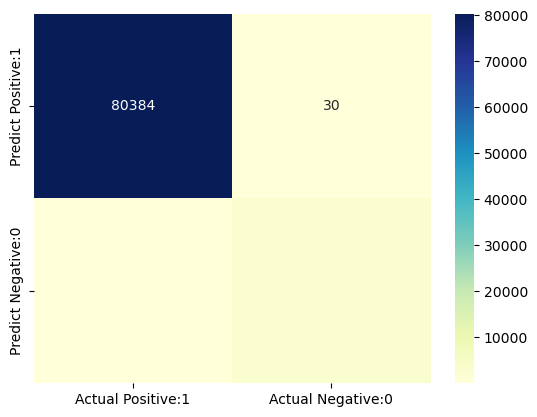

In [70]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80414
           1       0.99      0.99      0.99      2971

    accuracy                           1.00     83385
   macro avg       0.99      1.00      1.00     83385
weighted avg       1.00      1.00      1.00     83385



In [72]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [73]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9995


In [74]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0005


In [75]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9996


In [76]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9998


In [77]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9998


In [78]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0100


In [79]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9900
